# 1-1 

반복계산을 사용하여 Poisson equation 을 균일 격자계에서 주변 5개 격자점을 사용하여 계산하
시오. 1) Jacobi method, 2) Gauss‐Seidel method, 3) Gauss‐Seidel method with successive over‐relaxation (SOR)

# 1-1-jacobi Method

(1) Jacobi Mehtod

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
N = 21
x_list = np.linspace(0,1,N)
y_list = np.linspace(0,1,N)
X,Y = np.meshgrid(x_list,y_list)
h = x_list[1]-x_list[0]
u_0 = np.zeros((N,N))

In [91]:
def f1(x,y):
    f1 = np.sin(np.pi* x) * np.sin(np.pi*y)
    return f1

In [92]:
#Jacobi Method
def jacobi(u,h):
    u_new=np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - h**2 * f1(X[i,j],Y[i,j])) / 4
    return u_new

In [93]:
u_list_jacobi = []
u_list_jacobi.append(u_0)
u_list_jacobi.append(jacobi(u_0,h))

# count iteration i
i = 0
tol = 1e-5

while np.linalg.norm(u_list_jacobi[-1]-u_list_jacobi[-2]) > tol:
    i += 1
    u_jacobi = jacobi(u_list_jacobi[i],h)
    u_list_jacobi.append(u_jacobi)
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


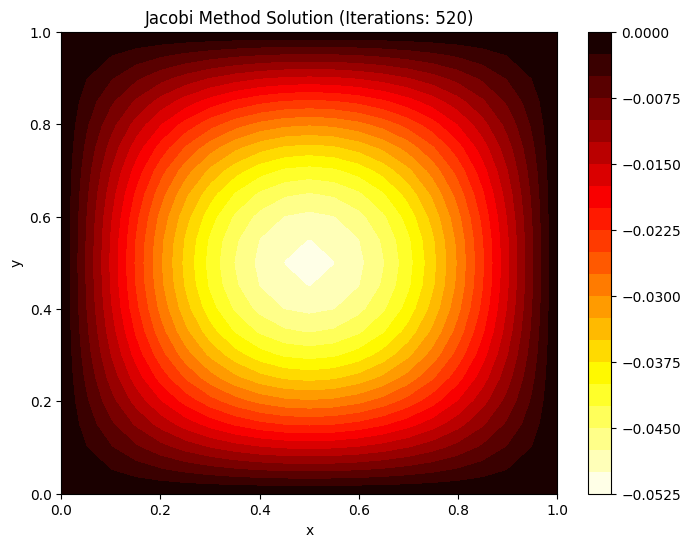

In [94]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_jacobi[-1], levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Jacobi Method Solution (Iterations: {i})')
plt.show()

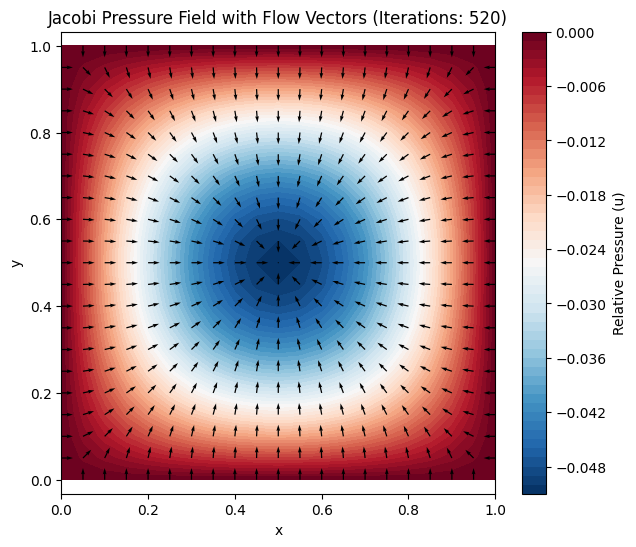

In [95]:
#유체역학 벡터장 표현
u_final = u_list_jacobi[-1]
# -----------------------------
# 3. 벡터 계산 (유체 흐름 방향)
# -----------------------------
# ∇u 계산 후 속도 방향 = -∇u
uy, ux = np.gradient(u_final, h, h)
Vx, Vy = -ux, -uy

# 방향만 보기 위해 정규화
mag = np.sqrt(Vx**2 + Vy**2)
Vx_norm = Vx / (mag + 1e-12)
Vy_norm = Vy / (mag + 1e-12)

# -----------------------------
# 4. 시각화 (압력장 + 흐름 방향)
# -----------------------------
plt.figure(figsize=(7,6))
plt.contourf(X, Y, u_final, levels=50, cmap='RdBu_r')
plt.colorbar(label='Relative Pressure (u)')

step = 1  # 화살표 간격
plt.quiver(X[::step,::step], Y[::step,::step],
           Vx_norm[::step,::step], Vy_norm[::step,::step],
           color='black')

plt.title(f'Jacobi Pressure Field with Flow Vectors (Iterations: {i})')
plt.xlabel('x'); plt.ylabel('y')
plt.axis('equal')
plt.show()

# 1-1-Guass Seidel Method

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
N = 21
x_list = np.linspace(0,1,N)
y_list = np.linspace(0,1,N)
X,Y = np.meshgrid(x_list,y_list)
h = x_list[1]-x_list[0]
u_0 = np.zeros((N,N))

In [98]:
def f1(x,y):
    f1 = np.sin(np.pi* x) * np.sin(np.pi*y)
    return f1

In [99]:
# Gauss-Seidel Method
def gauss_seidel(u,h):
    u_new = np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (u[i+1,j] + u_new[i-1,j] + u[i,j+1] + u_new[i,j-1] - h**2 * f1(X[i,j],Y[i,j]) ) / 4
    return u_new

In [100]:
u_list_gauss = []
u_list_gauss.append(u_0)
u_list_gauss.append(gauss_seidel(u_0,h))

i = 0
tol = 1e-5

while np.linalg.norm(u_list_gauss[-1] - u_list_gauss[-2]) > tol:
    i += 1
    u_gauss = gauss_seidel(u_list_gauss[i],h)
    u_list_gauss.append(u_gauss)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


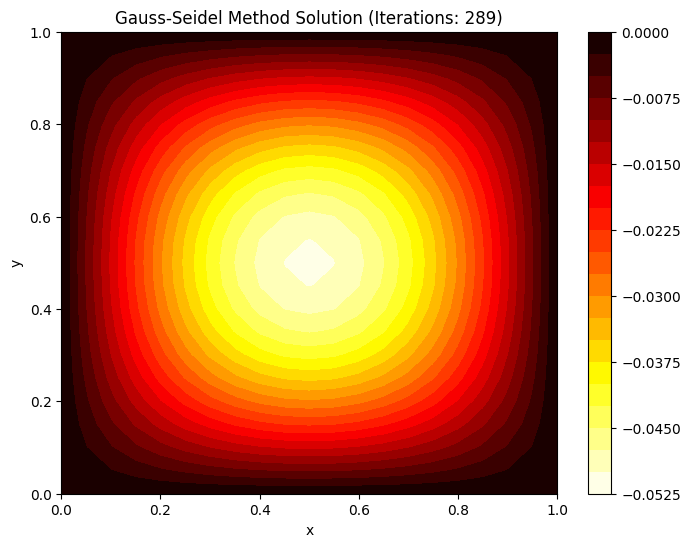

In [101]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_gauss[-1], levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Gauss-Seidel Method Solution (Iterations: {i})')
plt.show()

# 1-1-Gauss‐Seidel method with successive over‐relaxation (SOR)

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
N = 21
x_list = np.linspace(0,1,N)
y_list = np.linspace(0,1,N)
X,Y = np.meshgrid(x_list,y_list)
h = x_list[1]-x_list[0]
u_0 = np.zeros((N,N))

In [104]:
def f1(x,y):
    f1 = np.sin(np.pi* x) * np.sin(np.pi*y)
    return f1

In [105]:
# Gauss-Seidel Method with successive over-relaxation(SOR)
def SOR_method(u,h,omega = 1.5):  #omega 값이 2에 가까워질 수록 수렴속도 빨라지는 것을 볼 수 있음.
    u_new = np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (1-omega) * u[i,j] + omega * (u[i+1,j] + u_new[i-1,j] + u[i,j+1] + u_new[i,j-1] - h**2 * f1(X[i,j],Y[i,j])) / 4
    return u_new

In [106]:
u_list_SOR = []
u_list_SOR.append(u_0)
u_list_SOR.append(SOR_method(u_0,h))

i = 0
tol = 1e-5

while np.linalg.norm(u_list_SOR[-1] - u_list_SOR[-2]) > tol:
    i += 1
    u_SOR = SOR_method(u_list_SOR[i],h)
    u_list_SOR.append(u_SOR)
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


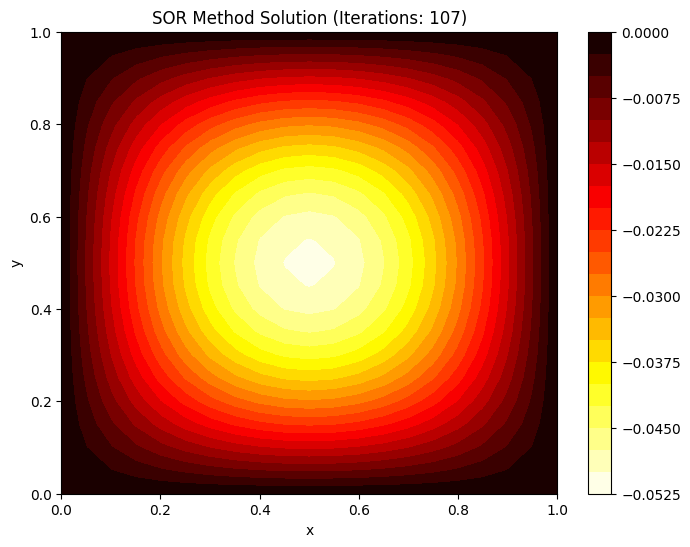

In [107]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_SOR[-1], levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'SOR Method Solution (Iterations: {i})')
plt.show()

# 1-2  

각 반복계산 방법의 Performance를 보이시오. Ex) norm of residual, errors, computational time, etc

In [108]:
#exact solution
def u_exact(x,y):
    return -np.sin(np.pi * x) * np.sin(np.pi * y) / (2*np.pi**2)

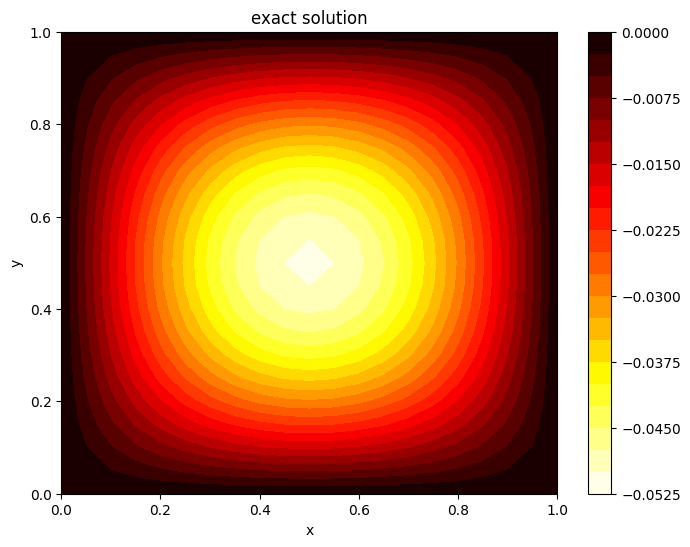

In [109]:
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_exact(X,Y), levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('exact solution')
plt.show()

In [110]:
#Jacobi Method performance
N = 21
x_list = np.linspace(0, 1, N) # x grid points 
y_list = np.linspace(0, 1, N) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
u_0 = np.zeros((N, N)) # initial condition

u_list_jacobi = []
u_list_jacobi.append(u_0)
u_list_jacobi.append(jacobi(u_0, h))
i = 0
i_list = [i,]

while np.linalg.norm(u_list_jacobi[-1] - u_list_jacobi[-2]) > 1e-5: 
    i += 1
    u_jacobi = jacobi(u_list_jacobi[i], h)
    u_list_jacobi.append(u_jacobi)
    i_list.append(i)

residual = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        laplacian = (u_list_jacobi[-1][i+1,j] + u_list_jacobi[-1][i-1,j] + u_list_jacobi[-1][i,j+1] + u_list_jacobi[-1][i,j-1] - 4*u_list_jacobi[-1][i,j]) / (h*h)
        residual[i,j] = laplacian - f1(X[i,j], Y[i,j])


print('Jacobi Method')
print('iteration:',i_list[-1])
print('Residual norm:', np.linalg.norm(residual))
print("error", np.linalg.norm(u_list_jacobi[-1] - u_exact(X, Y),2))

Jacobi Method
iteration: 520
Residual norm: 0.01573917632954167
error 0.00024395552097739053


In [111]:
#Guass-Seidel Method
N = 21
x_list = np.linspace(0, 1, N) # x grid points 
y_list = np.linspace(0, 1, N) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
u_0 = np.zeros((N, N)) # initial condition

u_list_gauss = []
u_list_gauss.append(u_0)
u_list_gauss.append(gauss_seidel(u_0, h))

i = 0
i_list = [i,]

while np.linalg.norm(u_list_gauss[-1] - u_list_gauss[-2]) > 1e-5: 
    i += 1
    u_gauss = gauss_seidel(u_list_gauss[i], h)
    u_list_gauss.append(u_gauss)
    i_list.append(i)

residual = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        laplacian = (u_list_gauss[-1][i+1,j] + u_list_gauss[-1][i-1,j] + u_list_gauss[-1][i,j+1] + u_list_gauss[-1][i,j-1] - 4*u_list_gauss[-1][i,j]) / (h*h)
        residual[i,j] = laplacian - f1(X[i,j], Y[i,j])

print('Gauss-Seidel Method')
print('iteration:',i_list[-1])
print('Residual norm:', np.linalg.norm(residual))
print("error", np.linalg.norm(u_list_gauss[-1] - u_exact(X, Y),2))

Gauss-Seidel Method
iteration: 289
Residual norm: 0.0077607690410414305
error 0.0006547778704003776


In [112]:
#SOR Method
N = 21
x_list = np.linspace(0, 1, N) # x grid points 
y_list = np.linspace(0, 1, N) # y grid points 
X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
h = x_list[1] - x_list[0] # grid spacing
u_0 = np.zeros((N, N)) # initial condition

u_list_SOR = []
u_list_SOR.append(u_0)
u_list_SOR.append(SOR_method(u_0, h))
i = 0
i_list = [i,]

while np.linalg.norm(u_list_SOR[-1] - u_list_SOR[-2]) > 1e-5: 
    i += 1
    u_SOR = SOR_method(u_list_SOR[i], h)
    u_list_SOR.append(u_SOR)
    i_list.append(i)

residual = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        laplacian = (u_list_SOR[-1][i+1,j] + u_list_SOR[-1][i-1,j] + u_list_SOR[-1][i,j+1] + u_list_SOR[-1][i,j-1] - 4*u_list_SOR[-1][i,j]) / (h*h)
        residual[i,j] = laplacian - f1(X[i,j], Y[i,j])

print('SOR Method')
print('iteration:',i_list[-1])
print('Residual norm:', np.linalg.norm(residual))
print("error", np.linalg.norm(u_list_SOR[-1] - u_exact(X, Y),2))


SOR Method
iteration: 107
Residual norm: 0.002634609393248058
error 0.0009256998420178142


# 2-1

동일한 방법으로 f1+f2 고려하여 u를 구하여라.

In [113]:
import numpy as np
import matplotlib.pyplot as plt

#parameter
N = 21
x_list = np.linspace(0,1,N)
y_list = np.linspace(0,1,N)
X,Y = np.meshgrid(x_list,y_list)
h = x_list[1]-x_list[0]
u_0 = np.zeros((N,N))


def f1(x,y):
    f1 = np.sin(np.pi* x) * np.sin(np.pi*y)
    return f1

def f2(x,y):
    return np.exp(-100*((x-0.5)**2 + (y-0.5)**2))

# f1 + f2
def SOR_method2(u,h,omega = 1.5):  #omega 값이 2에 가까워질 수록 수렴속도 빨라지는 것을 볼 수 있음.
    u_new = np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (1-omega) * u[i,j] + omega * (u[i+1,j] + u_new[i-1,j] + u[i,j+1] + u_new[i,j-1] - h**2 * (f1(X[i,j],Y[i,j]) + f2(X[i,j],Y[i,j]))) / 4
    return u_new

# f2
def SOR_method3(u,h,omega = 1.5):  #omega 값이 2에 가까워질 수록 수렴속도 빨라지는 것을 볼 수 있음.
    u_new = np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (1-omega) * u[i,j] + omega * (u[i+1,j] + u_new[i-1,j] + u[i,j+1] + u_new[i,j-1] - h**2 *  (f2(X[i,j],Y[i,j]))) / 4
    return u_new

SOR Method(f1+f2)
iteration: 109


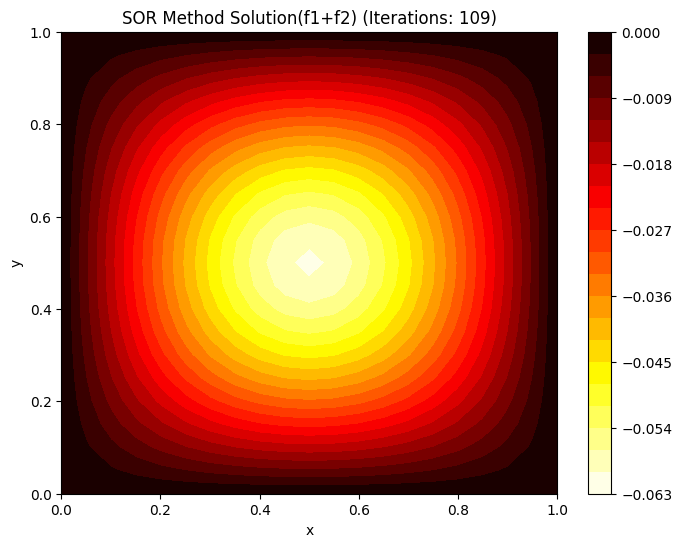

In [114]:

u_list_SOR2 = []
u_list_SOR2.append(u_0)
u_list_SOR2.append(SOR_method2(u_0, h))

i = 0
i_list = [i,]
tol = 1e-5

while np.linalg.norm(u_list_SOR2[-1] - u_list_SOR2[-2]) > tol: 
    i += 1
    u_SOR2 = SOR_method2(u_list_SOR2[i], h)
    u_list_SOR2.append(u_SOR2)
    i_list.append(i)


print('SOR Method(f1+f2)')
print('iteration:',i_list[-1])

plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_SOR2[-1], levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'SOR Method Solution(f1+f2) (Iterations: {i})')
plt.show()


# 2-2 

동일한 방법으로 f2만을 고려한 포아송 방정식의 해 u2를 구하시오.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

#parameter
N = 21
x_list = np.linspace(0,1,N)
y_list = np.linspace(0,1,N)
X,Y = np.meshgrid(x_list,y_list)
h = x_list[1]-x_list[0]
u_0 = np.zeros((N,N))


def f1(x,y):
    f1 = np.sin(np.pi* x) * np.sin(np.pi*y)
    return f1

def f2(x,y):
    return np.exp(-100*((x-0.5)**2 + (y-0.5)**2))

# f2
def SOR_method3(u,h,omega = 1.5):  #omega 값이 2에 가까워질 수록 수렴속도 빨라지는 것을 볼 수 있음.
    u_new = np.copy(u)
    for i in range(1,N-1):
        for j in range(1,N-1):
            u_new[i,j] = (1-omega) * u[i,j] + omega * (u[i+1,j] + u_new[i-1,j] + u[i,j+1] + u_new[i,j-1] - h**2 *  (f2(X[i,j],Y[i,j]))) / 4
    return u_new


SOR Method(f2)
iteration: 80


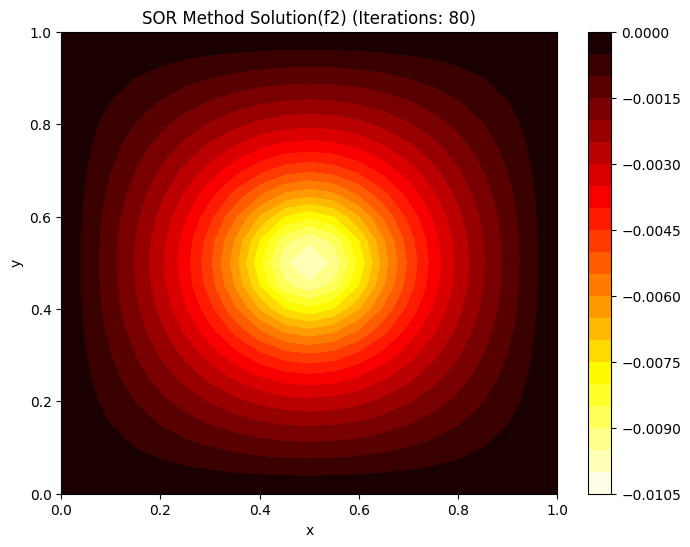

In [116]:
u_list_SOR3 = []
u_list_SOR3.append(u_0)
u_list_SOR3.append(SOR_method3(u_0, h))

i = 0
i_list = [i,]
tol = 1e-5

while np.linalg.norm(u_list_SOR3[-1] - u_list_SOR3[-2]) > tol: 
    i += 1
    u_SOR3 = SOR_method3(u_list_SOR3[i], h)
    u_list_SOR3.append(u_SOR3)
    i_list.append(i)


print('SOR Method(f2)')
print('iteration:',i_list[-1])

plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_SOR3[-1], levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'SOR Method Solution(f2) (Iterations: {i_list[-1]})')
plt.show()

# 2-3

문제에서 구한 해 u(x,y)와 1.문제에서 구한 u1(x,y) 그리고 2-(2)에서 구한 u2(x,y)들의 해를 비교하고 이에 대한 생각을 서술하시오.

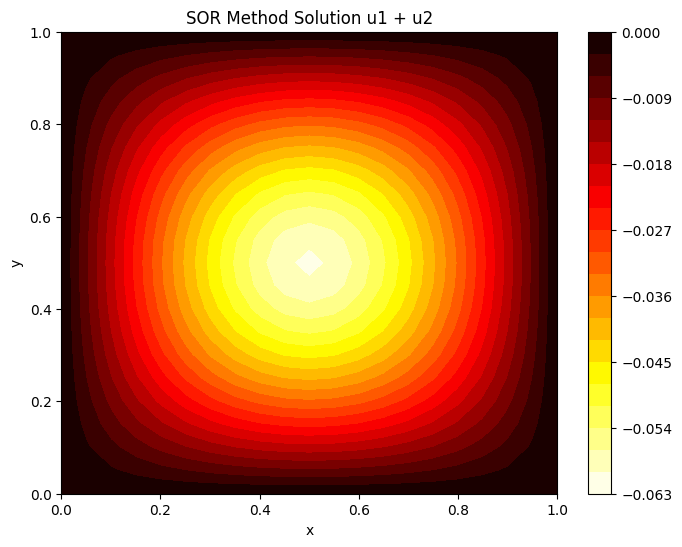

In [117]:
#SOR_method2(f1+f2)와 비교해보자.
u_list_sum = u_list_SOR3[-1]+u_list_SOR[-1]
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u_list_sum, levels=20, cmap='hot_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'SOR Method Solution u1 + u2')
plt.show()